In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import numpy as np
from pacological.fi import lif, hh, create_phi_zandt

In [9]:
# Calculate neuronal phi
t = 2 # 20
Is = np.linspace(0, 30, 100)
# Is = [300e-9, 300e-9]

# Taken from exp220
xfactor = 1
r = 675 * xfactor
w_e = 40
w_i = w_e * 4

# No osc
f = 0
trains, rates, ges, gis = hh(t, Is, f, 
                     r_e=r, r_i=r, w_e=w_e, w_i=w_i, 
                     verbose=False)

# Osc
f = 6
trains_f, rates_f, ges_f, gis_f = hh(t, Is, f, 
                           r_e=r, r_i=r, w_e=w_e, w_i=w_i, 
                           verbose=False)

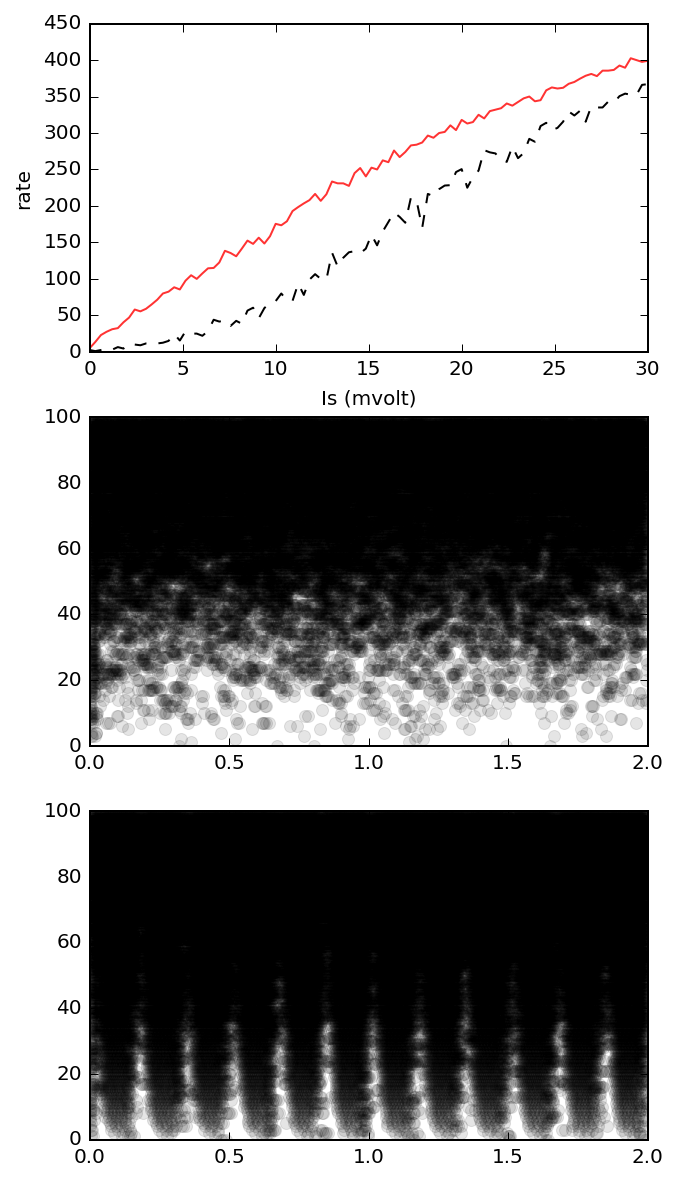

In [10]:
from fakespikes.util import spikedict_to
# Trains
ns, ts = spikedict_to(trains)
ns_f, ts_f = spikedict_to(trains_f)

plt.figure(figsize=(5, 10))
plt.subplot(312)
plt.plot(ts, ns, 'ok', alpha=0.1)

plt.subplot(313)
plt.plot(ts_f, ns_f, 'ok', alpha=0.1)

# F-I
plt.subplot(311)
plt.plot(Is, rates, 'k--')
plt.plot(Is, rates_f, 'r', alpha=0.8)
plt.xlabel("Is (mvolt)")
plt.ylabel("rate")

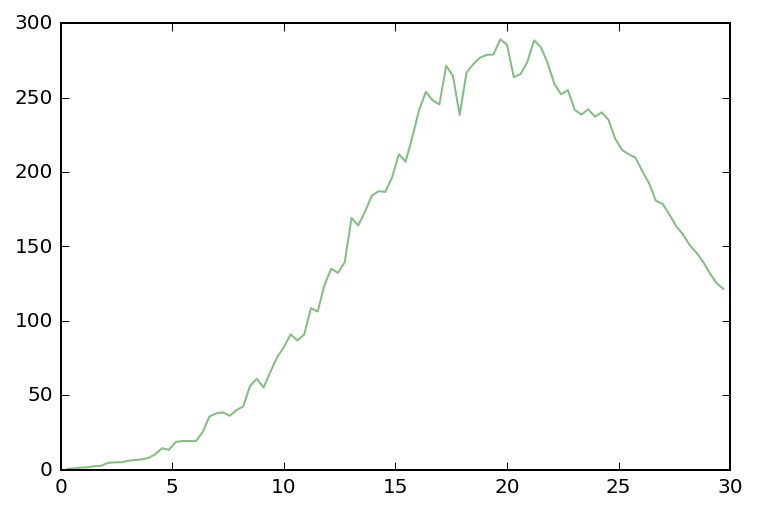

In [11]:
# Plot network phi

phi = create_phi_zandt(Is, rates, 0.1)
r_z = [phi(I, np.mean(Is), np.std(Is)) for I in Is[1:-1]]

# Plot
plt.plot(Is[1:-1], r_z, 'g', alpha=0.5);
# plt.plot(Is[1:-1], r_t, 'b', alpha=0.5)

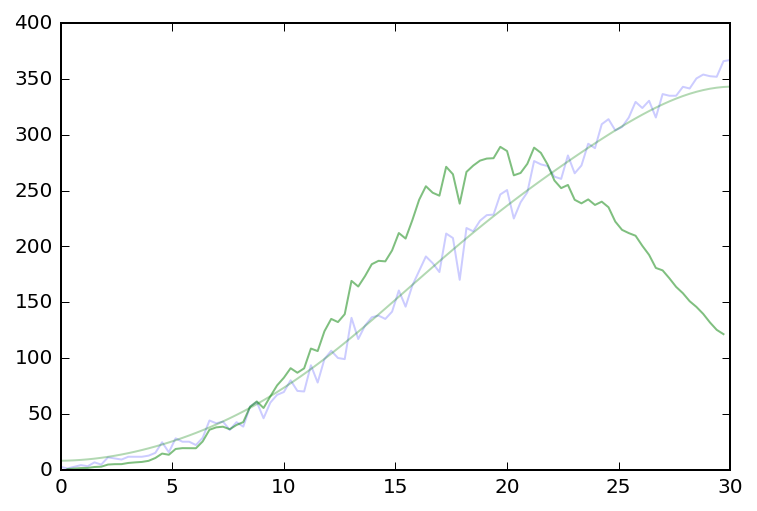

In [12]:
from scipy.ndimage.filters import gaussian_filter
plt.plot(Is, rates, 'b', alpha=0.2)
plt.plot(Is, gaussian_filter(rates, Is.std()), 'g', alpha=0.3)
plt.plot(Is[1:-1], r_z, 'g', alpha=0.5)